In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [32]:
data=pd.read_csv('rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [33]:
# Drop unnecessary columns
data = data[['timestamp', 'source', 'destination', 'cab_type', 'price', 'distance', 'surge_multiplier', 'temperature', 'precipIntensity']]

In [34]:
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

In [35]:
data = data.dropna()
data.describe()


,price,distance,surge_multiplier,temperature,precipIntensity
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,16.545125,2.189261,1.015068,39.582406,0.008909
std,9.324359,1.135413,0.095422,6.725500,0.026880
min,2.500000,0.020000,1.000000,18.910000,0.000000
25%,9.000000,1.270000,1.000000,36.450000,0.000000
50%,13.500000,2.160000,1.000000,40.490000,0.000000
75%,22.500000,2.930000,1.000000,43.580000,0.000000
max,97.500000,7.860000,3.000000,57.220000,0.144700


In [36]:
# Time Analysis
data['hour'] = data['timestamp'].dt.hour
data['month'] = data['timestamp'].dt.month

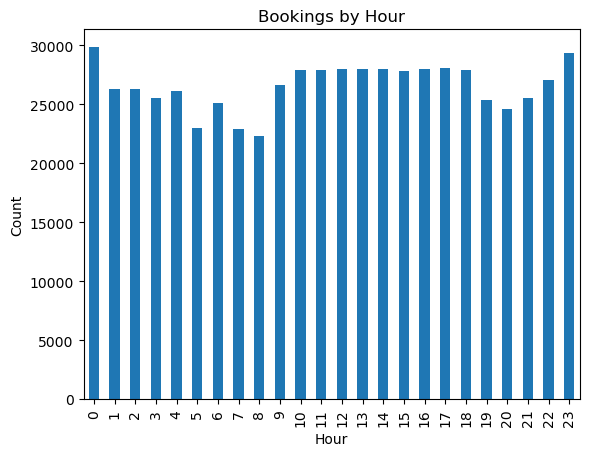

In [37]:
# Count bookings by hour
hourly_counts = data['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', title='Bookings by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

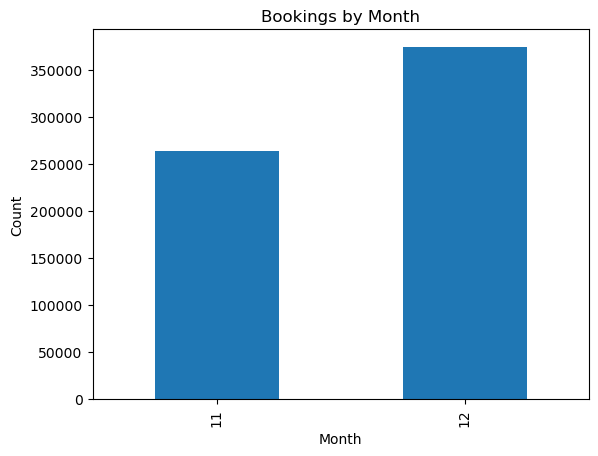

In [38]:
# Count bookings by month
monthly_counts = data['month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', title='Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

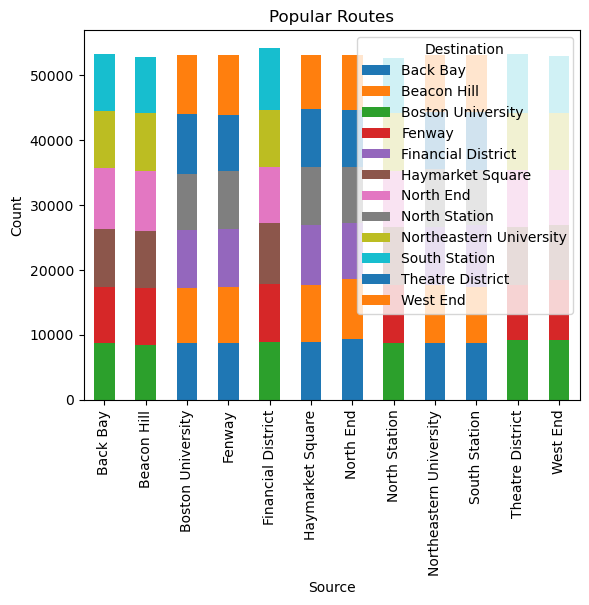

In [39]:
# Source-Destination Analysis
route_counts = data.groupby(['source', 'destination']).size().unstack().fillna(0)
route_counts.plot(kind='bar', stacked=True, title='Popular Routes')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Destination')
plt.show()

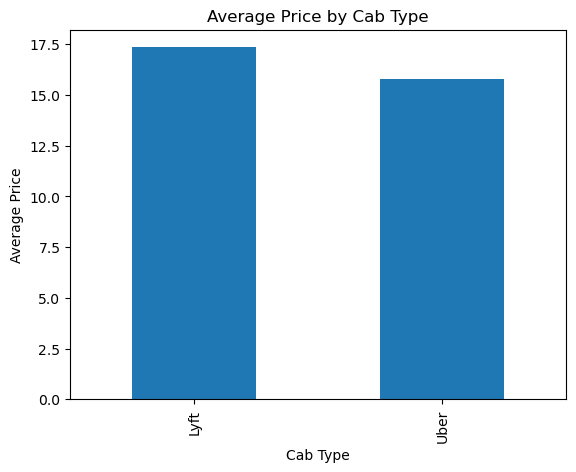

In [40]:
# Pricing Analysis
cab_price = data.groupby('cab_type')['price'].mean()
cab_price.plot(kind='bar', title='Average Price by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Average Price')
plt.show()

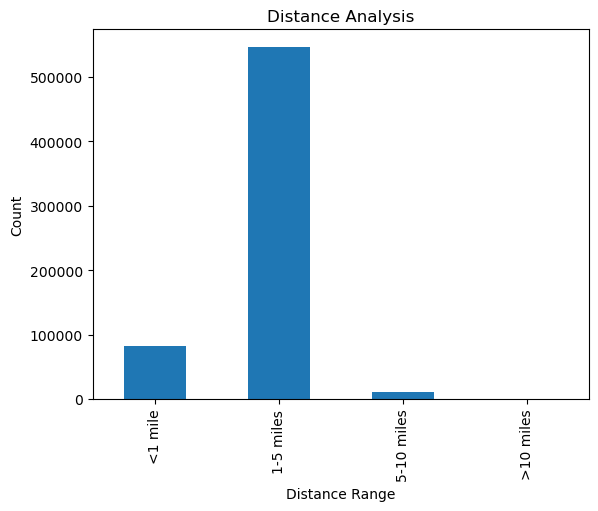

In [41]:
# Distance Analysis
distance_bins = pd.cut(data['distance'], bins=[0, 1, 5, 10, float('inf')], labels=['<1 mile', '1-5 miles', '5-10 miles', '>10 miles'])
distance_counts = distance_bins.value_counts().sort_index()
distance_counts.plot(kind='bar', title='Distance Analysis')
plt.xlabel('Distance Range')
plt.ylabel('Count')
plt.show()

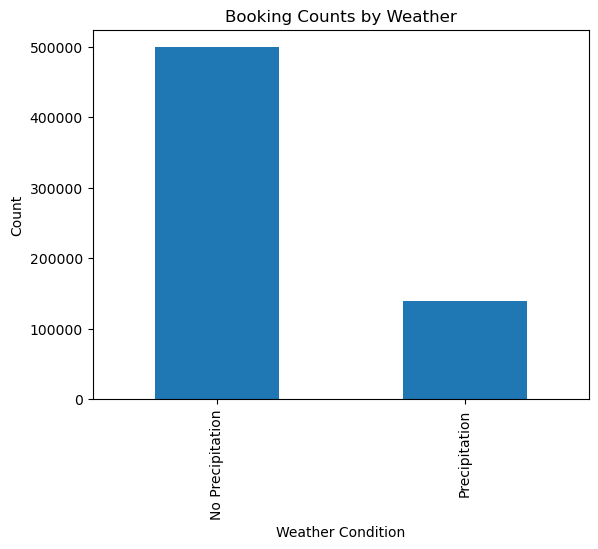

In [42]:
# Weather Analysis
weather_counts = data['temperature'].groupby(data['precipIntensity'].apply(lambda x: 'No Precipitation' if x == 0 else 'Precipitation')).count()
weather_counts.plot(kind='bar', title='Booking Counts by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

In [43]:
# customer segmentation and predictive modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [44]:
# Perform customer segmentation based on features like price, distance, temperature, and more.
features_for_segmentation = data[['price', 'distance', 'temperature']]

In [45]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_segmentation)

In [46]:
# Apply K-Means clustering 
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_features)

In [47]:

# Print the clustering assignments
print("Clustering Assignments:")
print(data[['source', 'destination', 'cluster']])

cluster_centers = kmeans.cluster_centers_

print("Shape of cluster_centers:", cluster_centers.shape)

num_features = cluster_centers.shape[1]

feature_names = [f'feature{i+1}' for i in range(num_features)]

cluster_centers_df = pd.DataFrame(cluster_centers, columns=feature_names)

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers_df)

Clustering Assignments:
                  source    destination  cluster
0       Haymarket Square  North Station        0
1       Haymarket Square  North Station        0
2       Haymarket Square  North Station        0
3       Haymarket Square  North Station        2
4       Haymarket Square  North Station        0
...                  ...            ...      ...
693065          West End      North End        0
693066          West End      North End        0
693067          West End      North End        0
693069          West End      North End        0
693070          West End      North End        0

[637976 rows x 3 columns]
Shape of cluster_centers: (3, 3)
Cluster Centers:
   feature1  feature2  feature3
0 -0.457157 -0.429003  0.448462
1  1.085403  0.988701  0.206576
2 -0.222494 -0.169615 -1.449896


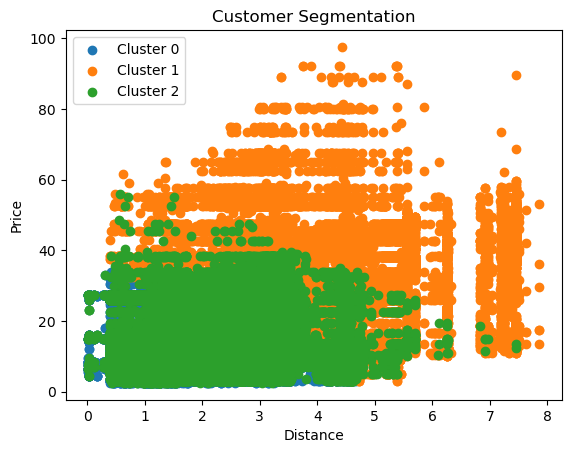

In [48]:
# Visualize customer segments
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['distance'], cluster_data['price'], label=f'Cluster {cluster}')
plt.title('Customer Segmentation')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
#Predictive modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [50]:
X = data[['distance', 'temperature']]
y = data['price']

In [51]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse=numpy.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 75.95180318885109
Root Mean Squared Error: 8.715033171987992


In [55]:
# Customer Segmentation Insights
segment_counts = data['cluster'].value_counts()

for cluster, count in segment_counts.items():
    print(f'Segment {cluster}: {count} customers')

Segment 0: 339924 customers
Segment 1: 169392 customers
Segment 2: 128660 customers


In [56]:
price_coefficients = model.coef_
print("Linear Regression Model Coefficients:")
print(f"Distance Coefficient: {price_coefficients[0]}")
print(f"Temperature Coefficient: {price_coefficients[1]}")


Linear Regression Model Coefficients:
Distance Coefficient: 2.8439672598837373
Temperature Coefficient: -5.721972062438755e-05


In [57]:
weather_counts = data['temperature'].groupby(data['precipIntensity'].apply(lambda x: 'No Precipitation' if x == 0 else 'Precipitation')).count()
print("Booking Counts by Weather Condition:")
print(weather_counts)

Booking Counts by Weather Condition:
precipIntensity
No Precipitation    499228
Precipitation       138748
Name: temperature, dtype: int64


In [58]:
# Identify Popular Routes
from collections import Counter

route_counts = Counter(zip(data['source'], data['destination']))

min_count = 50

# Filter routes with counts greater than or equal to min_count
popular_routes = [route for route, count in route_counts.items() if count >= min_count]

if popular_routes:
    print("Popular Routes with a Minimum of 50 Bookings:")
    for route in popular_routes:
        source, destination = route
        print(f"Route from {source} to {destination}")
else:
    print("No popular routes with a minimum of 50 bookings were identified.")

Popular Routes with a Minimum of 50 Bookings:
Route from Haymarket Square to North Station
Route from Back Bay to Northeastern University
Route from North End to West End
Route from North Station to Haymarket Square
Route from Beacon Hill to South Station
Route from North Station to Northeastern University
Route from North Station to Fenway
Route from North Station to South Station
Route from Haymarket Square to West End
Route from Haymarket Square to Theatre District
Route from North End to Beacon Hill
Route from Haymarket Square to Beacon Hill
Route from Boston University to North Station
Route from Fenway to West End
Route from South Station to Back Bay
Route from Fenway to North Station
Route from Theatre District to North End
Route from West End to Northeastern University
Route from North End to Back Bay
Route from Theatre District to Haymarket Square
Route from Beacon Hill to Fenway
Route from Back Bay to North End
Route from North Station to North End
Route from Financial Distri